<a href="https://colab.research.google.com/github/Gopikuppala7/MachineLearning/blob/main/Gopi_Kuppala.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/Poem_Data.csv')

# Display the first few rows of the dataframe
df.head()

,Genre,Poem
0,Music,NaN
1,Music,In the thick brushthey spend the...
2,Music,Storms are generous. ...
3,Music,—After Ana Mendieta Did you carry around the ...
4,Music,for Aja Sherrard at 20The portent may itself ...


In [ ]:
#Removing the Nan values
df.dropna(inplace=True)
df

,Genre,Poem
1,Music,In the thick brushthey spend the...
2,Music,Storms are generous. ...
3,Music,—After Ana Mendieta Did you carry around the ...
4,Music,for Aja Sherrard at 20The portent may itself ...
5,Music,"for Bob Marley, Bavaria, November 1980 Here i..."
...,...,...
836,Environment,Why make so much of fragmentary blue In here a...
837,Environment,"Woman, I wish I didn't know your name. What co..."
838,Environment,"Yonder to the kiosk, beside the creek, Paddle ..."
839,Environment,You come to fetch me from my work to-night Whe...


In [ ]:
import re

def clean_text(text):
    text = re.sub(r'http\S+', '', str(text))ni
    return text

df['cleaned_text'] = df['Poem'].apply(clean_text)
df

,Genre,Poem,cleaned_text
1,Music,In the thick brushthey spend the...,in the thick brushthey spend the hottes...
2,Music,Storms are generous. ...,storms are generous somethi...
3,Music,—After Ana Mendieta Did you carry around the ...,after ana mendieta did you carry around the m...
4,Music,for Aja Sherrard at 20The portent may itself ...,for aja sherrard at the portent may itself be...
5,Music,"for Bob Marley, Bavaria, November 1980 Here i...",for bob marley bavaria november here is the ...
...,...,...,...
836,Environment,Why make so much of fragmentary blue In here a...,why make so much of fragmentary blue in here a...
837,Environment,"Woman, I wish I didn't know your name. What co...",woman i wish i didnt know your name what could...
838,Environment,"Yonder to the kiosk, beside the creek, Paddle ...",yonder to the kiosk beside the creek paddle th...
839,Environment,You come to fetch me from my work to-night Whe...,you come to fetch me from my work tonightwhen ...


In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download the set of stop words
import nltk
nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    tokens = word_tokenize(text)
    filtered_words = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_words)

df['filtered_text'] = df['cleaned_text'].apply(remove_stopwords)
df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Genre,Poem,cleaned_text,filtered_text
1,Music,In the thick brushthey spend the...,in the thick brushthey spend the hottes...,thick brushthey spend hottest part day soaking...
2,Music,Storms are generous. ...,storms are generous somethi...,storms generous something easy surrender sitti...
3,Music,—After Ana Mendieta Did you carry around the ...,after ana mendieta did you carry around the m...,ana mendieta carry around matin star hold fore...
4,Music,for Aja Sherrard at 20The portent may itself ...,for aja sherrard at the portent may itself be...,aja sherrard portent may memory wallace steven...
5,Music,"for Bob Marley, Bavaria, November 1980 Here i...",for bob marley bavaria november here is the ...,bob marley bavaria november brilliant morning ...
...,...,...,...,...
836,Environment,Why make so much of fragmentary blue In here a...,why make so much of fragmentary blue in here a...,make much fragmentary blue bird butterfly flow...
837,Environment,"Woman, I wish I didn't know your name. What co...",woman i wish i didnt know your name what could...,woman wish didnt know name could silence house...
838,Environment,"Yonder to the kiosk, beside the creek, Paddle ...",yonder to the kiosk beside the creek paddle th...,yonder kiosk beside creek paddle swift caque t...
839,Environment,You come to fetch me from my work to-night Whe...,you come to fetch me from my work tonightwhen ...,come fetch work tonightwhen suppers table well...


In [ ]:
from nltk.stem import PorterStemmer, WordNetLemmatizer

nltk.download('wordnet')

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def stem_and_lemmatize(text):
    tokens = word_tokenize(text)
    stemmed = [stemmer.stem(word) for word in tokens]
    lemmatized = [lemmatizer.lemmatize(word) for word in stemmed]
    return ' '.join(lemmatized)

df['processed_text'] = df['filtered_text'].apply(stem_and_lemmatize)
df

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Genre,Poem,cleaned_text,filtered_text,processed_text
1,Music,In the thick brushthey spend the...,in the thick brushthey spend the hottes...,thick brushthey spend hottest part day soaking...,thick brushthey spend hottest part day soak ho...
2,Music,Storms are generous. ...,storms are generous somethi...,storms generous something easy surrender sitti...,storm gener someth easi surrend sit windowand ...
3,Music,—After Ana Mendieta Did you carry around the ...,after ana mendieta did you carry around the m...,ana mendieta carry around matin star hold fore...,ana mendieta carri around matin star hold fore...
4,Music,for Aja Sherrard at 20The portent may itself ...,for aja sherrard at the portent may itself be...,aja sherrard portent may memory wallace steven...,aja sherrard portent may memori wallac stevens...
5,Music,"for Bob Marley, Bavaria, November 1980 Here i...",for bob marley bavaria november here is the ...,bob marley bavaria november brilliant morning ...,bob marley bavaria novemb brilliant morn fish ...
...,...,...,...,...,...
836,Environment,Why make so much of fragmentary blue In here a...,why make so much of fragmentary blue in here a...,make much fragmentary blue bird butterfly flow...,make much fragmentari blue bird butterfli flow...
837,Environment,"Woman, I wish I didn't know your name. What co...",woman i wish i didnt know your name what could...,woman wish didnt know name could silence house...,woman wish didnt know name could silenc hous f...
838,Environment,"Yonder to the kiosk, beside the creek, Paddle ...",yonder to the kiosk beside the creek paddle th...,yonder kiosk beside creek paddle swift caque t...,yonder kiosk besid creek paddl swift caqu thou...
839,Environment,You come to fetch me from my work to-night Whe...,you come to fetch me from my work tonightwhen ...,come fetch work tonightwhen suppers table well...,come fetch work tonightwhen supper tabl well s...


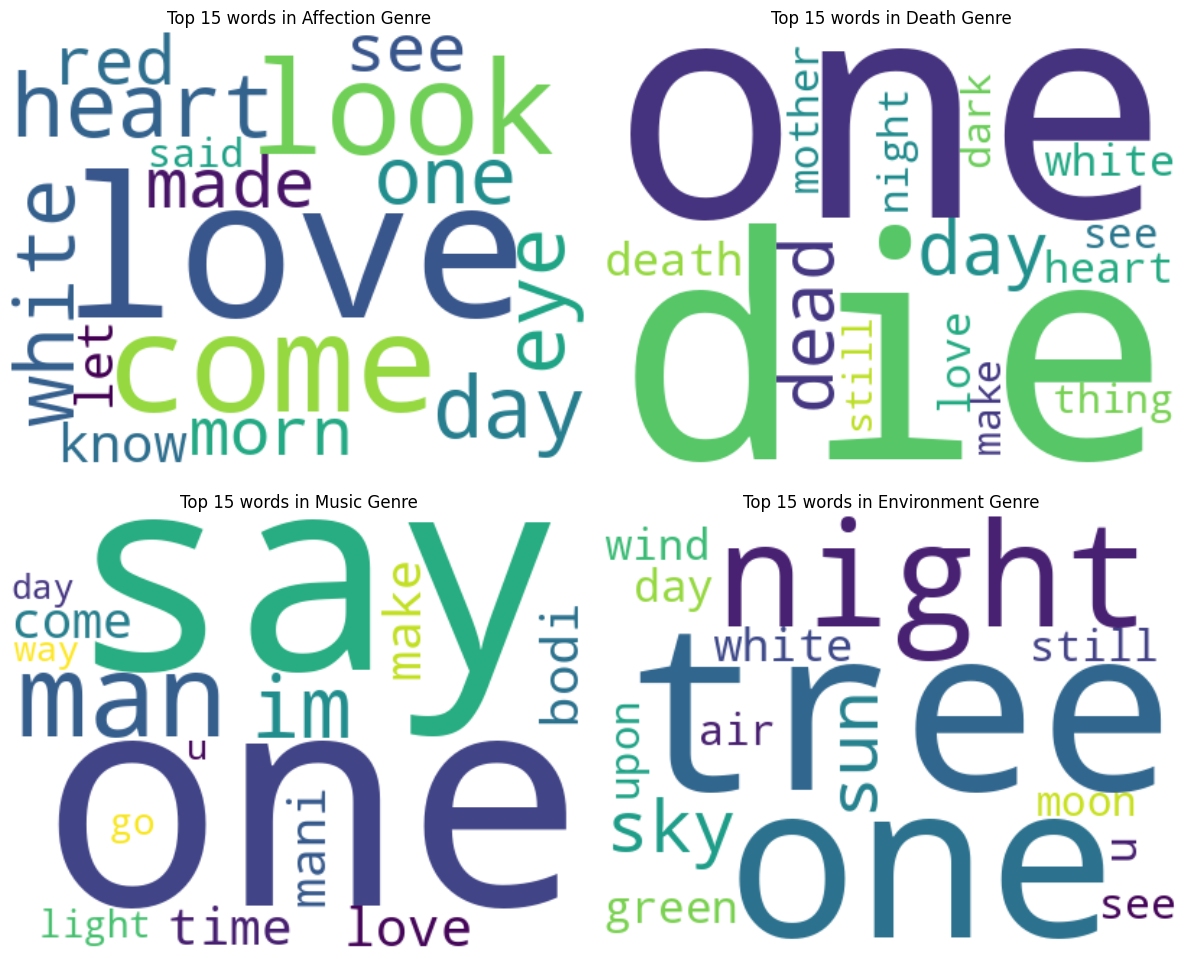

In [ ]:
#WordCloud illstration of 4 Genre
import matplotlib.pyplot as plt
from wordcloud import WordCloud
# Create separate dataframes for each genre
affection = df[df['Genre'] == 'Affection']
death = df[df['Genre'] == 'Death']
music = df[df['Genre'] == 'Music']
environment = df[df['Genre'] == 'Environment']

# Generate word clouds for each genre
def generate_word(df, genre_name, ax):
    text = ''.join(df['processed_text'])
    wordcloud = WordCloud(width=400, height=300, max_words=15, background_color='white').generate(text)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(f"Top 15 words in {genre_name} Genre")
    ax.axis('off')

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

generate_word(affection, 'Affection', ax=axes[0, 0])
generate_word(death, 'Death', ax=axes[0, 1])
generate_word(music, 'Music', ax=axes[1, 0])
generate_word(environment, 'Environment', ax=axes[1, 1])

plt.tight_layout()
plt.show()



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # considering only the top 1000 features
tfidf_features = tfidf_vectorizer.fit_transform(df['processed_text'])

# Convert to array to view as a DataFrame, using the updated method to get feature names
feature_array = tfidf_features.toarray()
tfidf_df = pd.DataFrame(feature_array, columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df.head()

,ach,across,action,ad,add,afraid,afternoon,age,ago,ah,...,yearn,yell,yellow,yesterday,yet,youd,young,your,youth,youv
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming there's a 'label' column in your dataframe for classification
X_train, X_test, y_train, y_test = train_test_split(tfidf_features, df['Genre'], test_size=0.2, random_state=42)
#logistic regression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
con_matrix=confusion_matrix(y_test,y_pred)

# Calculate accuracy & classification report
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(con_matrix)

Accuracy: 0.36904761904761907
              precision    recall  f1-score   support

   Affection       0.26      0.23      0.24        22
       Death       0.39      0.33      0.36        45
 Environment       0.46      0.39      0.42        54
       Music       0.32      0.45      0.38        47

    accuracy                           0.37       168
   macro avg       0.36      0.35      0.35       168
weighted avg       0.38      0.37      0.37       168

[[ 5  6  5  6]
 [ 5 15  6 19]
 [ 4 10 21 19]
 [ 5  7 14 21]]


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=100)
tfidf_features = tfidf_vectorizer.fit_transform(df['processed_text'])

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Assuming your data has a target variable 'label'
X_train, X_test, y_train, y_test = train_test_split(tfidf_features, df['Genre'], test_size=0.2, random_state=42)

#Built and train the Naive Bayes classifier
nbc_class=MultinomialNB()
nbc_class.fit(X_train,y_train)
#prediction
ypred=nbc_class.predict(X_test)
#model evaluation
class_re=classification_report(y_test,y_pred)
#confusion matrix
con_matrix=confusion_matrix(y_test,y_pred)
#print evaluation metrics
print(class_re)
print(con_matrix)

              precision    recall  f1-score   support

   Affection       0.26      0.23      0.24        22
       Death       0.39      0.33      0.36        45
 Environment       0.46      0.39      0.42        54
       Music       0.32      0.45      0.38        47

    accuracy                           0.37       168
   macro avg       0.36      0.35      0.35       168
weighted avg       0.38      0.37      0.37       168

[[ 5  6  5  6]
 [ 5 15  6 19]
 [ 4 10 21 19]
 [ 5  7 14 21]]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Assuming your data has a target variable 'label'
X_train, X_test, y_train, y_test = train_test_split(tfidf_features, df['Genre'], test_size=0.2, random_state=42)

# Initialize and train the SVC
model = SVC(kernel='linear')  # Using a linear kernel
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

Accuracy: 0.35714285714285715
              precision    recall  f1-score   support

   Affection       0.24      0.23      0.23        22
       Death       0.30      0.27      0.28        45
 Environment       0.49      0.37      0.42        54
       Music       0.35      0.49      0.41        47

    accuracy                           0.36       168
   macro avg       0.34      0.34      0.34       168
weighted avg       0.37      0.36      0.36       168

